<a href="https://colab.research.google.com/github/jad3g/jad3g/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Loan_Data = pd.read_csv('/content/Loan_Data.csv')

In [ ]:
Loan_Data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
Loan_Data.shape

(614, 13)

In [ ]:
Loan_Data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
Loan_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
Loan_Data.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
Loan_Data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
Loan_Data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
Loan_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


<Axes: xlabel='Loan_Status'>

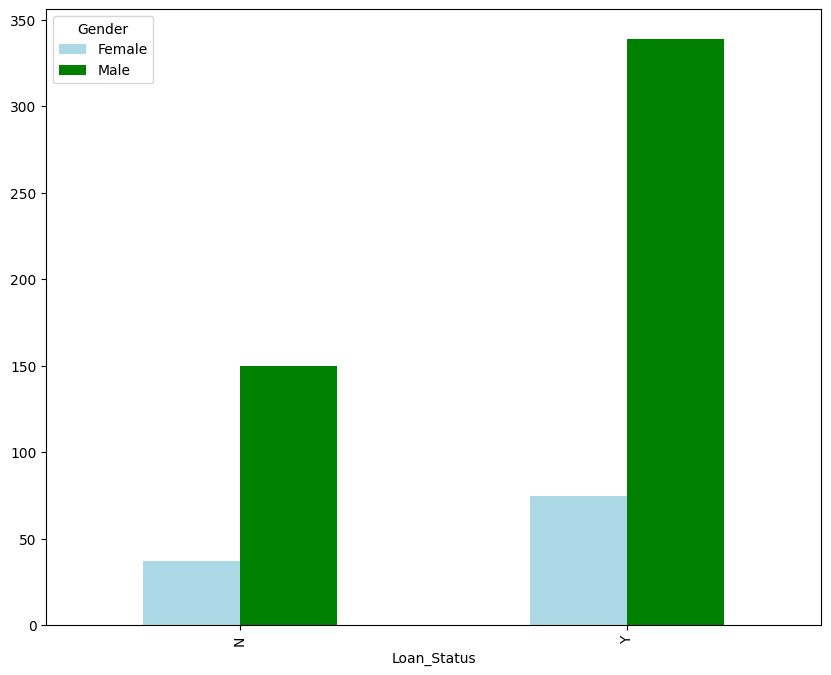

In [ ]:
pd.crosstab(Loan_Data['Loan_Status'], Loan_Data['Gender']).plot(kind="bar",
                                                                figsize=(10,8),
                                                                color=["lightblue", "green"])

In [ ]:
pd.crosstab(Loan_Data['Loan_Status'], Loan_Data['Married'])

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,285


In [ ]:
# building a correlation matrix
corr_matrix = Loan_Data.corr()
corr_matrix

<ipython-input-103-8cf7d259d533>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Loan_Data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<ipython-input-104-2d8bdc86fefb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Loan_Data.corr(method='pearson')


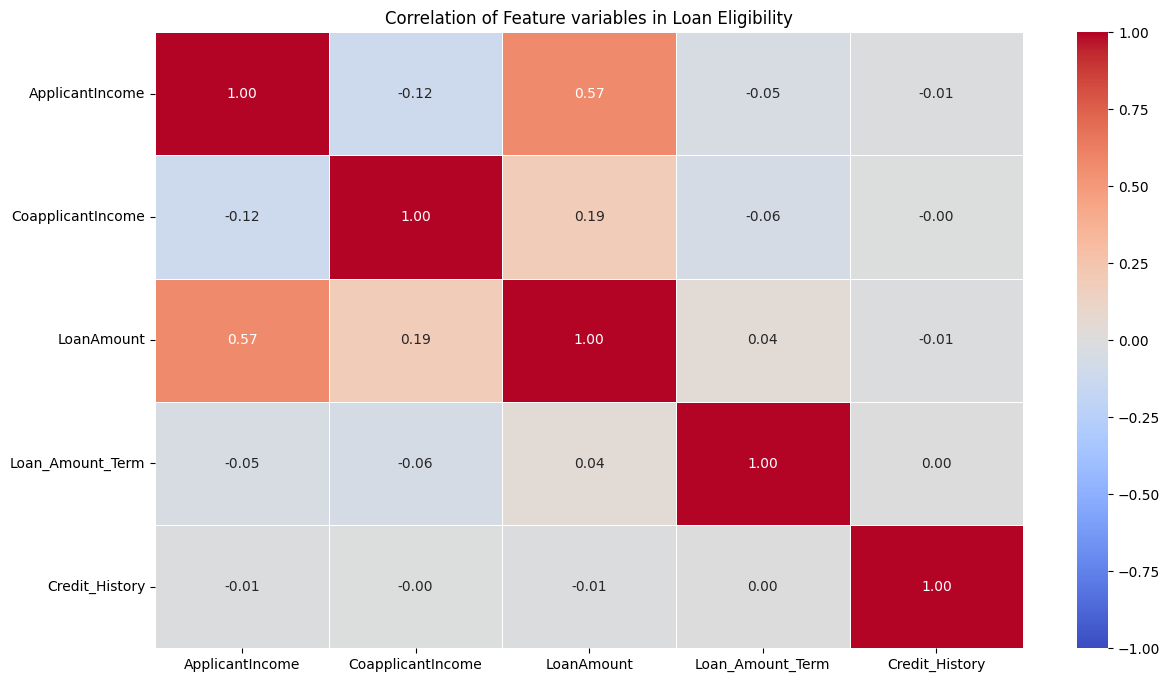

In [ ]:
corr_matrix = Loan_Data.corr(method='pearson')
plt.subplots(figsize=(14,8))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            annot=True, linewidth=0.5,vmin=-1,vmax=1,cmap="coolwarm",
            fmt=".2f")
plt.title("Correlation of Feature variables in Loan Eligibility")
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Handling the missing categorical values
cat_var = ['Gender','Married','Self_Employed','Dependents']
Loan_Data[cat_var] = Loan_Data[cat_var].fillna('unknown')

# Handling missing numerical variables
num_var = ['LoanAmount','Loan_Amount_Term','Credit_History']
imputer = SimpleImputer(strategy='mean')
Loan_Data[num_var] = imputer.fit_transform(Loan_Data[num_var])

In [ ]:
Loan_Data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
label_enc = LabelEncoder()
columns_to_encode = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Education', 'Property_Area', 'Loan_Status']

for column in columns_to_encode:
    Loan_Data[column] = label_enc.fit_transform(Loan_Data[column])


In [ ]:
Loan_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
Loan_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
Loan_Data.drop(columns=['Loan_ID'], inplace=True)

In [ ]:
Loan_Data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [ ]:
Loan_Data['Loan_Status'].value_counts(normalize=True)*100

1    68.729642
0    31.270358
Name: Loan_Status, dtype: float64

<Axes: >

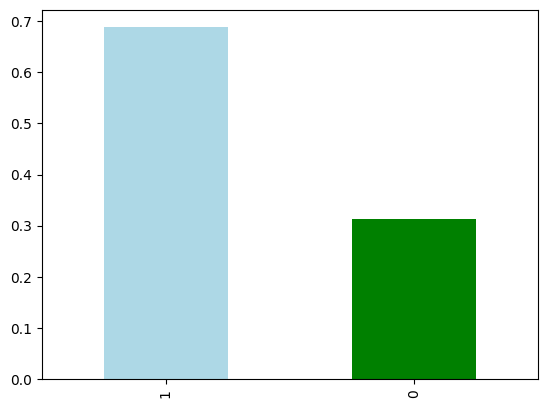

In [ ]:
Loan_Data['Loan_Status'].value_counts(normalize=True).plot(kind="bar", color=["lightblue", "green"])

In [ ]:
# splitting the dataset into X and y
X = Loan_Data.drop('Loan_Status', axis=1)
y = Loan_Data['Loan_Status']

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
# Feature Scaling to normalize the dataset using the MinMax Scaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)
X_transform_df = pd.DataFrame(X_transform, columns=X.columns)

In [ ]:
X_transform_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.5,0.0,0.00,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0
1,0.5,0.5,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,0.5,0.5,0.00,0.0,0.5,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,0.5,0.5,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,0.5,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.00,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,0.5,0.5,0.75,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,0.5,0.5,0.25,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,0.5,0.5,0.50,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


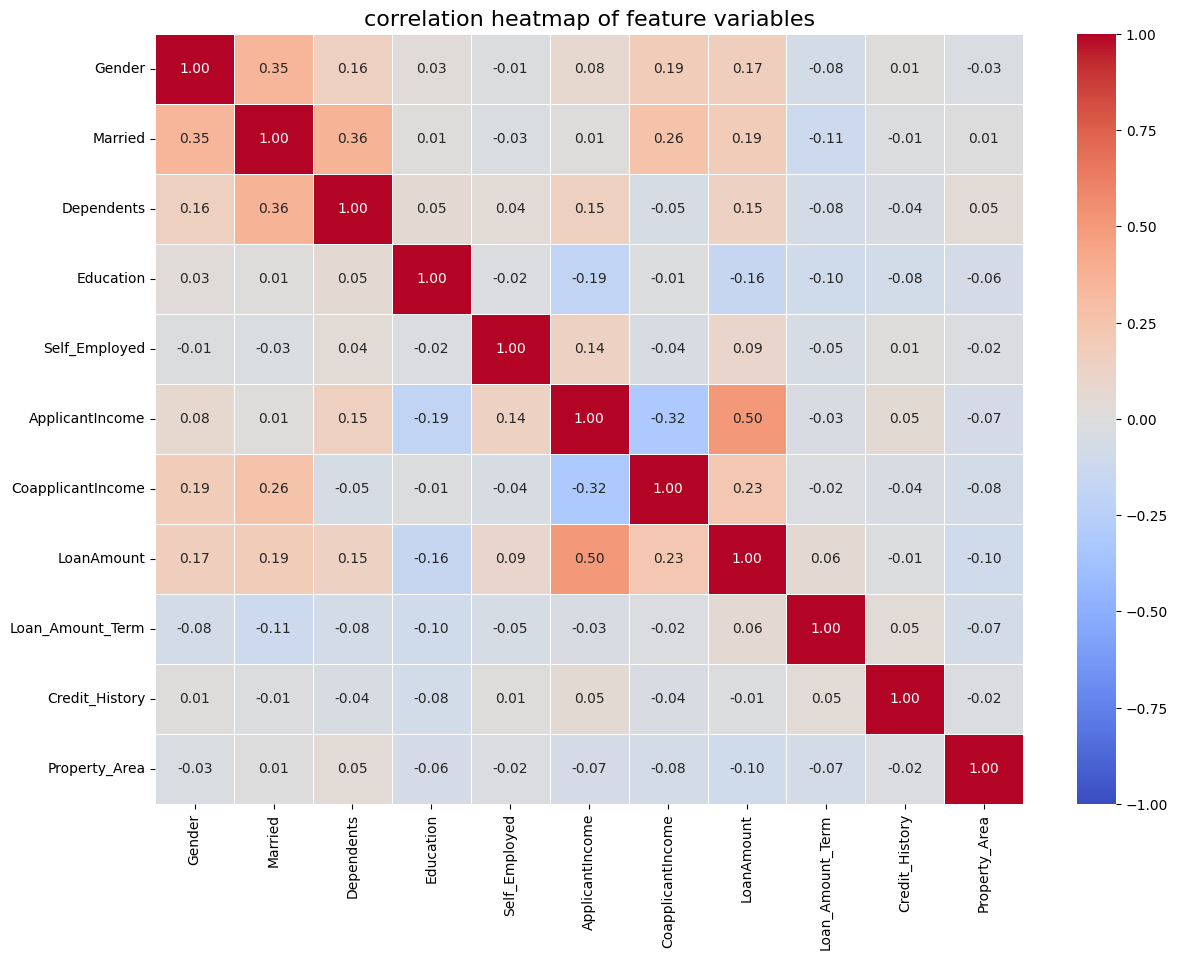

In [ ]:
# Visualizing the relationship between the feature variables
new_corr_matrix = X_transform_df.corr(method="spearman")

# creating a correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(new_corr_matrix, vmin=-1, vmax=1, annot=True,
            cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('correlation heatmap of feature variables', fontsize=16)
plt.show()

In [ ]:
#Balancing the features using theSMOTE_Tomek technique
SMOTE_Tomek = SMOTETomek(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = SMOTE_Tomek.fit_resample(X_transform_df, y)

In [ ]:
X_resampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.5,0.0,0.00,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0
1,0.5,0.5,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,0.5,0.5,0.00,0.0,0.5,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,0.5,0.5,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,0.5,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [ ]:
y_resampled.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

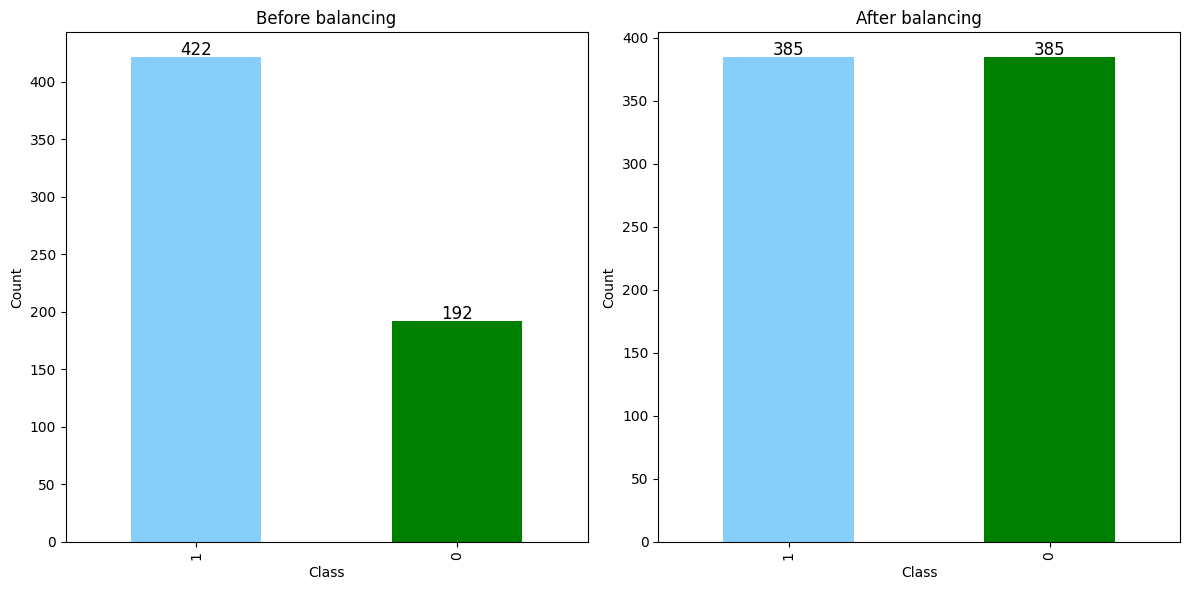

In [ ]:
# adding count labels on top of the bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Plot the value counts with a bar graph before SMOTE_Tomek
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = pd.Series(y).value_counts().plot(kind="bar", color=["lightskyblue", "green"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Before balancing")
add_count_labels(ax1)

# Plot the value counts with a bar graph after SMOTE_Tomek
plt.subplot(1, 2, 2)
ax2 = pd.Series(y_resampled).value_counts().plot(kind="bar", color=["lightskyblue", "green"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("After balancing")
add_count_labels(ax2)

plt.tight_layout()
plt.show()

In [ ]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train, len(X_train)

(       Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
 60   0.500000      0.0        0.00        1.0       0.000000         0.037724   
 623  0.243919      0.5        0.00        0.0       0.256081         0.054689   
 615  0.500000      0.5        0.00        1.0       0.000000         0.032098   
 687  0.000000      0.0        0.00        0.0       0.000000         0.044906   
 760  0.000000      0.0        0.00        0.0       0.000000         0.030614   
 ..        ...      ...         ...        ...            ...              ...   
 71   0.500000      0.5        0.75        0.0       0.000000         0.037316   
 106  0.500000      0.5        1.00        0.0       0.000000         0.068237   
 270  0.000000      0.0        0.00        0.0       0.000000         0.027829   
 435  0.500000      0.0        0.00        1.0       0.000000         0.031528   
 102  0.000000      0.5        0.00        0.0       0.000000         0.037316   
 
      Coapplic

In [ ]:
y_train, len(y_train)

(60     0
 623    0
 615    0
 687    0
 760    0
       ..
 71     0
 106    1
 270    0
 435    1
 102    1
 Name: Loan_Status, Length: 616, dtype: int64,
 616)

In [ ]:
# applying machine learning models
# XGBoost and Gradient Boosting Technique
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC




In [ ]:
models = {
    "Bagging Classifier": BaggingClassifier(estimator=SVC(), n_estimators=100, max_samples=1.0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    "XGB Classifier": XGBClassifier(learning_rate=1.0, n_estimators=100),
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_scores[name] = accuracy * 100
        print(f"{name} Accuracy: {accuracy * 100:.2f}%")

    return model_scores

models_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print("Model Scores:\n", models_scores)


Bagging Classifier Accuracy: 81.17%
Gradient Boosting Accuracy: 83.77%
XGB Classifier Accuracy: 87.01%
Model Scores:
 {'Bagging Classifier': 81.16883116883116, 'Gradient Boosting': 83.76623376623377, 'XGB Classifier': 87.01298701298701}


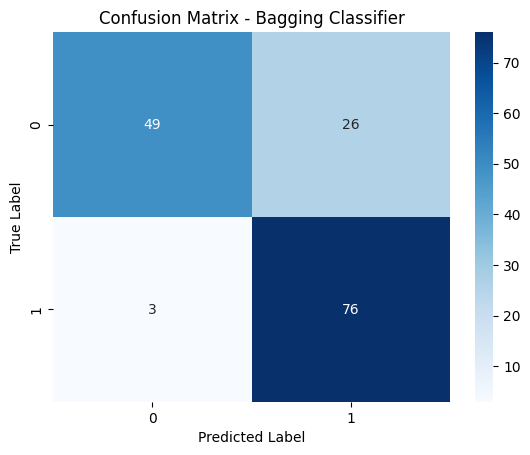

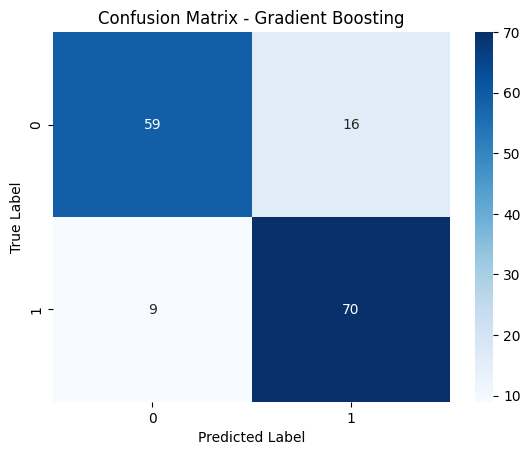

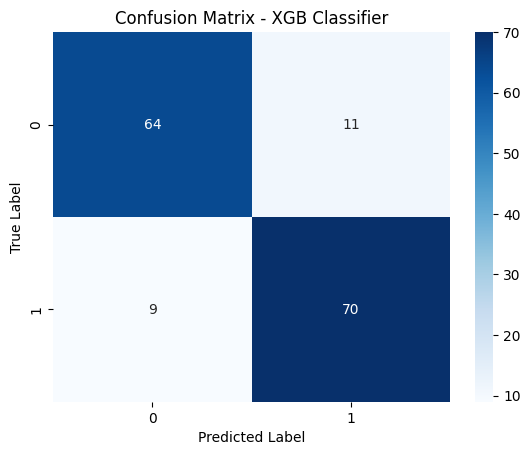

In [ ]:
models = {
    "Bagging Classifier": BaggingClassifier(estimator=SVC(), n_estimators=100, max_samples=1.0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    "XGB Classifier": XGBClassifier(learning_rate=1.0, n_estimators=100),
}

# Define the fit_and_score function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Plot confusion matrix
        plot_confusion_matrix(y_test, y_pred, title=name)

# Define the plot_confusion_matrix function
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Assuming you have X_train, X_test, y_train, and y_test defined somewhere before this code block
fit_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
models = {
    "Bagging Classifier": BaggingClassifier(estimator=SVC(), n_estimators=100, max_samples=1.0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    "XGB Classifier": XGBClassifier(learning_rate=1.0, n_estimators=100),
}

# cross validation
for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, cv=5, verbose=True, scoring='accuracy')
  print(f"{name} Cross- Validation Accuracy: {np.mean(scores) *100:.2f}%")

Bagging Classifier Cross- Validation Accuracy: 73.38%
Gradient Boosting Cross- Validation Accuracy: 80.36%
XGB Classifier Cross- Validation Accuracy: 81.49%


In [ ]:
# hyperparameter optimization of models
models_with_params = {
    "Bagging Classifier": (BaggingClassifier(estimator=SVC()), {'n_estimators': [50, 100, 150], 'max_samples': [0.8, 1.0]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]}),
    "XGB Classifier": (XGBClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]}),
}

for name, (model, param_grid) in models_with_params.items():
  gs = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
  gs.fit(X_train, y_train)

  best_params = gs.best_params_
  best_score = gs.best_score_

  print(f"{name} Best Parameters: {best_params}")
  print(f"{name} Best Cross-Validation Accuracy: {best_score * 100:.2f}%")

Bagging Classifier Best Parameters: {'max_samples': 1.0, 'n_estimators': 150}
Bagging Classifier Best Cross-Validation Accuracy: 73.38%
Gradient Boosting Best Parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Gradient Boosting Best Cross-Validation Accuracy: 81.18%
XGB Classifier Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
XGB Classifier Best Cross-Validation Accuracy: 83.28%
